In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train  = "D:/DL Data/archive/chest_xray/train"

In [3]:
train_data = ImageDataGenerator().flow_from_directory(train, (150, 150), batch_size=5, shuffle= False)

Found 5216 images belonging to 2 classes.


In [4]:
test = "D:/DL Data/archive/chest_xray/test"

In [5]:
test_data = ImageDataGenerator().flow_from_directory(test, (150, 150), batch_size=5, shuffle= False)

Found 624 images belonging to 2 classes.


In [6]:
from keras.models import Sequential

通过调用Sequential()函数，将创建一个Sequential类实例并将其分配给变量模型。这个实例将作为一个容器，您可以在其中添加不同的层来构建您的CNN模型。

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

该行为模型添加了一个二维卷积层。Conv2D 层对输入数据进行卷积运算。传递给 Conv2D 的参数有
32：层中的滤波器（也称为通道）数量。这意味着该层将输出32个特征图。
(3, 3): 卷积核或滤波器的大小。这里是 3x3 内核，表示该层将用 32 个不同的 3x3 过滤器对输入进行卷积。
input_shape=(150, 150, 3)： 输入数据的形状。在本例中，它希望输入的图像大小为150x150，有3个颜色通道（RGB图像）。
activation="relu"： 应用于层输出的逐元素激活函数。这里使用的是整流线性单元（ReLU）激活，它将非线性引入网络。

MaxPooling将二维最大集合层添加到模型中。MaxPooling2D 层通过取每个集合窗口内的最大值来减少输入的空间尺寸（宽度和高度）。参数 (2, 2) 表示池化窗口大小为 2x2。

Dropout为模型添加了一个剔除层。剔除层会在每一步训练中随机将一部分输入单元设置为 0。参数0.2指定了丢弃率，这意味着在训练过程中将有20%的输入单元被设置为0，这有助于防止过拟合。

In [10]:
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

In [11]:
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

In [12]:
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

In [13]:
model.add(Flatten())

代码段`model.add(Flatten())`为神经网络中的模型添加了一个 "Flatten "层。

Flatten "层是Keras中的一个简单实用层，用于将输入数据转换为一维数组。它通常在网络架构中从卷积层过渡到全连接层时使用。

在使用CNN时，早期层通常负责使用卷积和池化操作从输入数据中提取空间特征。然而，后续层（通常是全连接层）需要一维输入。这就是 "扁平化 "层发挥作用的地方。

通过在模型中添加 "model.add(Flatten())"，可以确保上一层（可能是卷积层或池化层）的输出在传递到下一层之前被扁平化为一维数组。这种扁平化操作保留了从上一层获得的信息，但将其重塑为适合全连接层的格式。

添加 "Flatten "层后，您可以继续添加其他层，如密集层、剔除层等，这取决于您想为神经网络创建的具体架构。

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

model.summary() "函数提供了模型架构的摘要，包括层名称、输出形状和可训练参数的数量。通过在Keras模型上调用该函数，您可以获得网络结构的简明概览。

输出将显示模型中每一层的以下信息：

1. 层（类型）： 模型中层的类型。
2. 输出形状： 层产生的输出形状。
3. Param #：层中可训练参数的数量。
4. 连接到： 表示与当前层相连的层。

摘要提供了对模型的有用概述，允许您快速检查层的大小，检查任何意外的输出形状，并获得需要训练的参数总数的概念。

值得注意的是，您应该在构建和编译模型后调用 `model.summary()`。它将显示模型中所有层的详细信息，并提供对模型复杂度和参数数量的粗略估计，这对于了解模型的容量和潜在的过拟合非常有用。

In [15]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

1. 密集层：
   使用`Dense`类为模型添加了一个全连接层。Dense "层是神经网络中的一种标准层类型，其中每个神经元都与上一层中的每个神经元相连。传给`Dense`的参数是
   - `128`: 层中神经元或单元的数量。
   - `activation="relu"`： 应用于层输出的激活函数，在本例中是整流线性单元（ReLU）。ReLU引入非线性，帮助模型学习数据中的复杂模式。

2. 剔除层
   这一行为模型添加了另一个Dropout层。Dropout层在每个训练步骤中随机地将一部分输入单元设置为0，以减少过拟合。参数`0.2`指定了剔除率，表示在训练过程中将有20%的输入单元被随机设置为0。

通过向模型添加这些层，可以扩展模型的架构。密集层引入了额外的隐藏单元来捕捉数据中更复杂的模式，而丢弃层则通过在训练过程中随机丢弃一部分单元来防止过拟合。

In [16]:
model.add(Dense(2,activation="softmax"))

`为模型添加了另一个稠密层，但配置不同：
1. 使用Softmax激活的密集层：
   这一行为模型添加了一个全连接层，有2个输出单元。Dense "层用于创建一个全连接的神经网络层，其中每个神经元都与上一层中的每个神经元相连。参数 "2 "指定了层中单元或神经元的数量，表示该层将输出2个类别的概率分布。
   该层使用的激活函数是 "softmax"。Softmax激活常用于多类分类问题，将最终层的输出转换为概率分布。它可确保输出值归一化并和为1，代表输入属于每个类别的概率。

通过添加具有软最大激活功能的密集层，您可以将模型配置为具有两个类别的多类分类任务。 该层的输出将是两个类别的概率分布，表示输入属于每个类别的可能性。
请记住，神经网络的架构可以根据具体问题和数据特征而变化。 您可以修改单元数、添加或删除层数，并尝试使用不同的激活函数来定制符合您特定要求的模型。

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [18]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

代码段`model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])`用于使用特定设置编译模型以进行训练。

下面是`compile`函数中每个参数的作用：

1. 损失函数：
   loss "参数指定了训练过程中使用的损失函数。在本例中，选择`"categorical_crossentropy"。分类交叉熵通常用作多类分类问题的损失函数，其中目标变量使用单次编码表示。

2. 优化器
   参数 "optimizer "指定了在训练过程中用于更新模型权重和偏置的优化算法。这里使用的是 "adam"，代表自适应矩估计。Adam是一种流行的优化算法，可以根据损失函数的梯度动态调整学习率，因此适用于多种问题。

3. 度量：
   metrics "参数是一个评估指标列表，用于监测模型在训练过程中的表现。在本例中，该列表包含一个指标 "accuracy"。准确率指标是分类任务中常用的评估指标，用于衡量正确预测样本的百分比。

模型编译完成后，就可以进行训练了。在训练过程中，模型将使用指定的优化器以最小化所选损失函数为目标。它还将根据提供的指标跟踪性能。

您可以根据问题的具体要求修改这些编译设置。根据任务性质、数据类型和其他因素，不同的损失函数、优化器和指标可能更适合您。

In [22]:
h = model.fit(train_data, batch_size=5, epochs=5)

Epoch 1/5
1044/1044 [==============================] - 136s 129ms/step - loss: 2.7232 - accuracy: 0.7398
Epoch 2/5
1044/1044 [==============================] - 140s 134ms/step - loss: 0.3957 - accuracy: 0.8294
Epoch 3/5
1044/1044 [==============================] - 122s 117ms/step - loss: 0.4052 - accuracy: 0.8470
Epoch 4/5
1044/1044 [==============================] - 130s 124ms/step - loss: 0.2977 - accuracy: 0.8706
Epoch 5/5
1044/1044 [==============================] - 135s 130ms/step - loss: 0.2919 - accuracy: 0.9015


In [23]:
import matplotlib.pyplot as plt

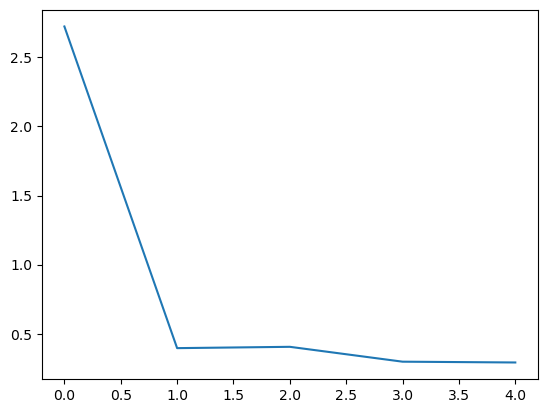

In [25]:
plt.plot(h.history["loss"])

In [26]:
pred = model.predict(test_data)

125/125 [==============================] - 12s 97ms/step


代码段 "pred = model.predict(test_data) "用于从训练有素的模型中获取给定测试数据集的预测结果。
1. 模型"： 指您之前编译和训练的训练模型。

2. `test_data`： 代表您要进行预测的输入数据。测试数据的格式应与模型预期的输入形状兼容。
   重要的是要确保测试数据以与训练数据相同的方式进行预处理（例如，归一化、调整大小），以保持一致性。

3. model.predict(test_data)`： 调用模型对象上的`predict()`函数，将测试数据作为参数传递。该函数使用训练有素的模型对给定的测试数据生成预测。
   model.predict()`的输出将是一个预测值或概率数组，具体取决于您要解决的问题类型。
   如果您正在处理分类任务，输出将是每个类的预测概率数组。数组中的每个元素对应测试数据中的一个特定实例。
   如果您正在处理回归任务，输出将是一个预测值数组。
   无论哪种情况，`pred`的形状都取决于测试数据的大小和输出类或目标变量的数量。

执行代码后，变量`pred`将包含模型针对给定测试数据生成的预测值。您可以进一步分析、评估或比较这些预测与地面实况标签或目标，以评估模型的性能。

In [27]:
import numpy as np
pred = np.argmax(pred,axis=1)

代码段 "pred = np.argmax(pred, axis=1) "用于从模型生成的预测概率或值中获取预测的类标签。

np.argmax(pred,axis=1)`： 调用`numpy`中的`argmax()`函数来获取沿指定轴的最大值的索引。在本例中，`axis=1`表示沿第二个轴（列）执行操作。

   通过沿第二个轴应用`argmax()`，代码确定了测试数据中每个实例的最高预测值的索引。该索引对应于预测的类标签。

   得到的数组`pred`将包含测试数据的预测类标签。

需要注意的是，`argmax()`返回的是最大值的索引，而不是实际的类标签。因此，输出数组`pred`将包含代表预测类别的数值。您可能需要根据具体问题和数据集，将这些数值标签映射回相应的类名或标签。

通过使用`np.argmax(pred, axis=1)`，您可以将预测的概率或值转换为预测的类标签，以便进一步分析、评估或与基本真实标签或目标进行比较。

In [30]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(test_data.classes,pred)

代码段`cm = confusion_matrix(test_data.classes, pred)`计算真实类标签(`test_data.classes`)和预测类标签(`pred`)之间的混淆矩阵。
下面解释一下这段代码是如何工作的：

1. 混淆矩阵 指scikit-learn库提供的计算混淆矩阵的函数。

2. `test_data.classes`： 代表测试数据的真实类标签。假设`test_data`是一个数据生成器或数据对象，其`classes`属性包含真实类标签。

3. 预测 代表从模型中得到的预测类标签，通常使用`np.argmax(pred, axis=1)`或类似方法。预测类标签的顺序应该与真实类标签的顺序相同。

通过调用`confusion_matrix(test_data.classes, pred)`，代码会比较真实类标签和预测类标签，并计算一个称为混淆矩阵的正方形矩阵。矩阵的行代表真实类标签，列代表预测类标签。
混淆矩阵的元素表示属于某一真实类别的样本数和被预测属于某一预测类别的样本数。通过该矩阵可以了解模型在正确分类和错误分类样本方面的性能。
得到的混淆矩阵存储在变量 "cm "中，可对其进行进一步分析或可视化，以评估模型的性能，识别误分类模式，并得出各种性能指标，如准确率、精确度、召回率和F1-分数。

In [34]:
cm

array([[121, 113],
       [ 25, 365]], dtype=int64)

In [35]:
print("accuracy is", (cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is 0.7788461538461539


代码段`print("accuracy is", (cm[0,0]+cm[1,1])/sum(sum(cm))` 根据混淆矩阵(`cm`)计算并打印准确度指标。）

1. (cm[0,0]+cm[1,1])`： 这部分对混淆矩阵(`cm`)的对角元素求和。在混淆矩阵中，对角元素代表正确分类的样本。

   cm[0,0]`代表真阴性（TN）或正确分类为阴性类的样本数。

   cm[1,1]`代表真阳性（TP）或正确分类为阳性类的样本数。

   将这些对角元素相加，就得到了正确分类的样本总数。

2. sum(sum(cm))"： 这部分计算混淆矩阵中所有元素的总和，代表样本总数。

   sum(cm) "计算混淆矩阵各行的和，从而得到每个真类中的样本数。

   然后，`sum(sum(cm))`计算所有行向和的总和，得出样本总数。

3. (cm[0,0]+cm[1,1])/sum(sum(cm))`： 将正确分类的样本总数除以样本总数，即为准确度指标。

   准确度指标表示正确分类的样本占样本总数的比例。

4. `print("accuracy is", (cm[0,0]+cm[1,1])/sum(sum(cm)))`： 最后，使用`print()`函数打印出精度值以及说明性信息。

通过执行这段代码，您可以根据所提供的混淆矩阵获得并显示模型的准确度。准确度度量了模型在正确分类样本方面的整体表现。